In [1]:
from perimeter_area import perimeter_area
import SpectralSynthesis as ss
from helper_functions import noisy_nonperiodic_xfbm as nnxfbm

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
N=128
H=0.5
E=2
S=1
SEED=42

c:\Github\thesis-images\SpectralSynthesis.py:61: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


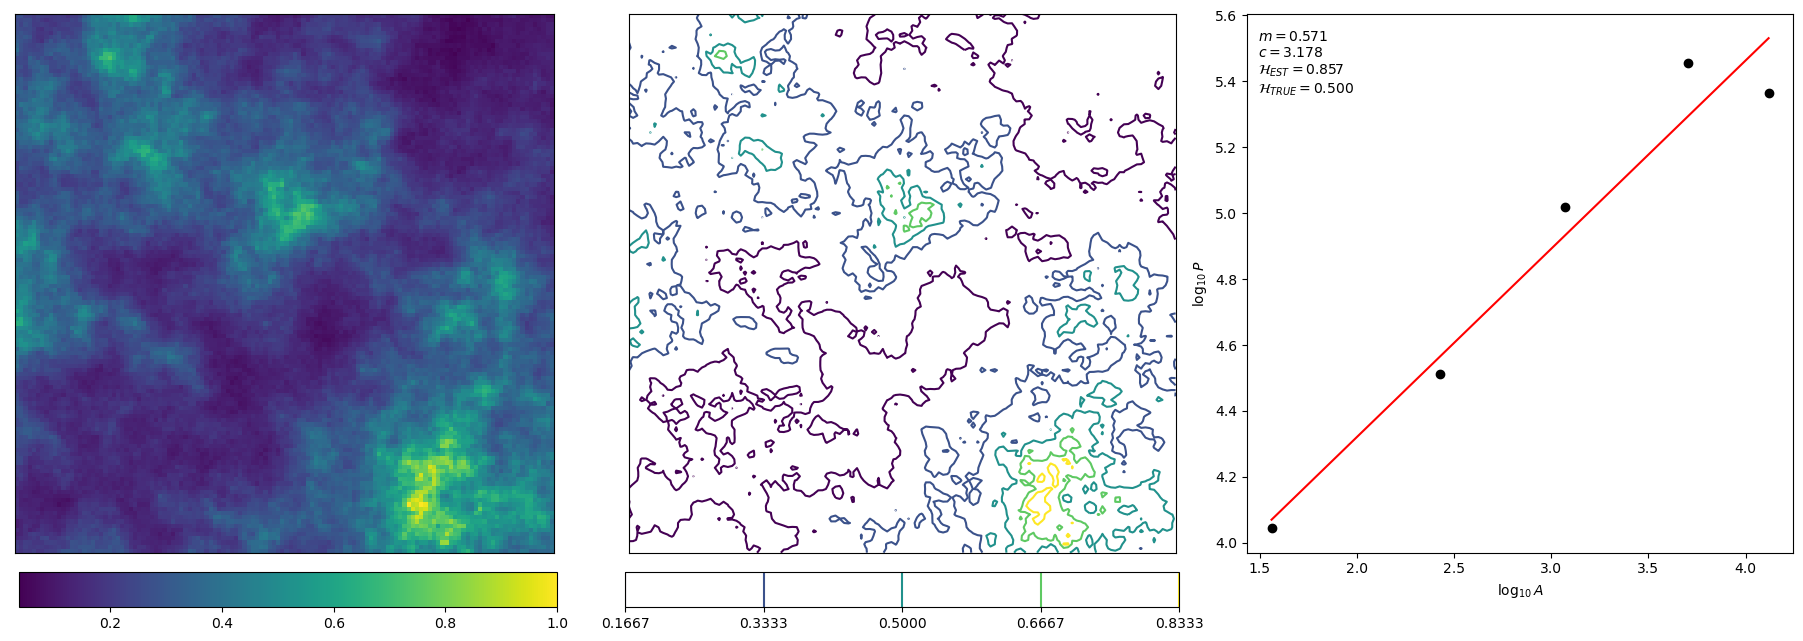

In [3]:
field = nnxfbm(N=N, E=E, H=H, S=S, noise=0.05, seed=SEED)

PA = perimeter_area(field, 5)

x_points = np.array([np.min(np.log10(PA.areas)), np.max(np.log10(PA.areas))])

f,ax = plt.subplots(1,3, figsize = (23,7))
img = ax[0].imshow(field, origin='lower')
cs = ax[1].contour(field, levels=PA.levels)
ax[2].scatter(np.log10(PA.areas), np.log10(PA.perimeters),c='k')
ax[2].plot(x_points,x_points*PA.gradient+PA.intercept,c='r')
ax[2].set_xlabel(r'$\log_{10}A$')
ax[2].set_ylabel(r'$\log_{10}P$')

ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_xticks([])
ax[1].set_yticks([])

text = rf"""
$m={round(PA.gradient,3):.3f}$
$c={round(PA.intercept,3):.3f}$
$\mathcal{{H}}_{{EST}}={round(PA.hurst,3):.3f}$
$\mathcal{{H}}_{{TRUE}}={round(H,3):.3f}$
"""

ax[2].text(0.02, 0.82, text, transform=ax[2].transAxes)

cbaxes = f.add_axes([0.1285, 0.032, 0.234, 0.05]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes)

cbaxes2 = f.add_axes([0.392, 0.032, 0.241, 0.05]) 
cb2 = plt.colorbar(cs,orientation="horizontal", cax = cbaxes2)

f.subplots_adjust(wspace=0.13, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 3/PA_initial_128.png', bbox_inches = 'tight')
plt.show()

# Effect of Number of contours on result using same field as above

100%|██████████| 50/50 [01:50<00:00,  2.22s/it]


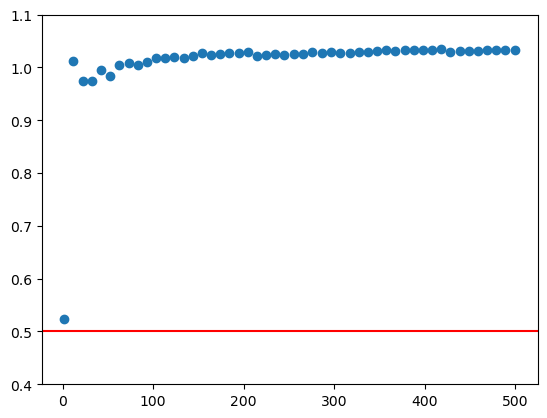

In [5]:
h = []
n_c = np.linspace(2,500,50, dtype = int)

for gs in tqdm(n_c):
    pa = perimeter_area(field, gs)
    h.append(pa.hurst)

plt.figure()
plt.scatter(n_c, h)
plt.axhline(H, c='r')
plt.ylim(0.4,1.1)
plt.show()

# Generate 1000 fields and view statistics

In [6]:
N_pix = 128
E=2
N_iter = 1000
S_max = 3
N_cont= 2

H_samples = np.random.random(N_iter)
S_samples = np.random.random(N_iter)*S_max
noise_samples = np.random.random(N_iter)*0.05

H_est = []
S_est = []

for H, S, noise in tqdm(zip(H_samples, S_samples, noise_samples), total=N_iter):
    field = nnxfbm(N=N_pix, E=E, H=H, S=S, noise=noise)

    pa = perimeter_area(field, N_cont)

    H_est.append(pa.hurst)
    S_est.append(np.std(field.flatten()))

1000it [04:53,  3.41it/s]


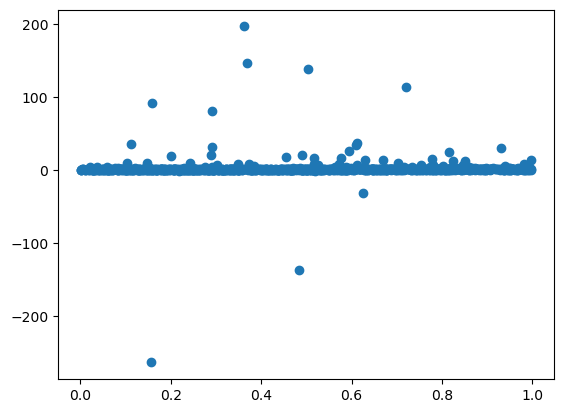

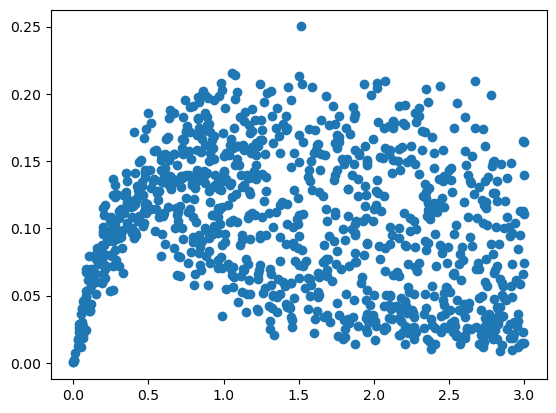

In [8]:
plt.figure()
plt.scatter(H_samples,H_est)
plt.show()

plt.figure()
plt.scatter(S_samples,S_est)
plt.show()